# core consistency demo

In [1]:
import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
from pprint import pprint
import itertools

import cp
import base

import metrics
import seaborn
import utils

In [2]:
X = loadmat('datasets/aminoacids.mat')['X'][0][0]['data']
X = X/np.linalg.norm(X)
rank = 3
savedict = {'X':X}
for i in range(1,6):
    factors, result, initial_factors, log = cp.cp_opt(X, rank=i, method='cg', init='svd', gtol=1e-15)
    #factors, result = cp.cp_als(X, rank=3, init='svd', convergence_th=1e-15, verbose=False)


    A, B, C = factors
    print(f'core consistency for rank {i}: {metrics.core_consistency(X,A,B,C):.2f}')
    savedict[f'factors_rank_{i}'] = factors

core consistency for rank 1: 100.00
core consistency for rank 2: 100.00
core consistency for rank 3: 99.84
core consistency for rank 4: 95.23
core consistency for rank 5: -3.45


In [3]:
print(savedict.keys())
savemat("cc_factors_all_ranks.mat", savedict)

dict_keys(['X', 'factors_rank_1', 'factors_rank_2', 'factors_rank_3', 'factors_rank_4', 'factors_rank_5'])


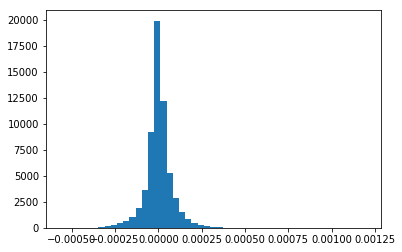

In [4]:
reconstructed_tensor = base.ktensor(*factors)
residuals = ((X-reconstructed_tensor)).ravel()

plt.hist(residuals, bins=np.linspace(residuals.min(), residuals.max(), 50))
plt.show()

In [5]:
num_max_components = 5
cc = metrics.calculate_core_consistencies(X, num_max_components)
print(cc)

[100.0, 99.99999999999007, 99.8365610790327, 95.23333974235396, -3.4450840808053274]


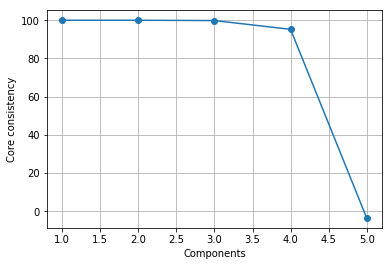

In [6]:
plt.plot(range(1,num_max_components+1), cc,'-o')
plt.grid()
plt.xlabel('Components')
plt.ylabel('Core consistency')
plt.show()

In [7]:
np.random.seed(0)
sizes = [10, 15, 20]
rank = 3

tensor, factors, norms, noise = utils.create_data(sizes, rank, noise_factor=0.2)

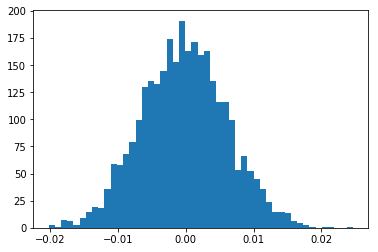

In [8]:
reconstructed_tensor = base.ktensor(*factors)
residuals = (tensor-reconstructed_tensor).ravel()

plt.hist(residuals, bins=np.linspace(residuals.min(), residuals.max(), 50))
plt.show()

[100.0, 99.99999999999007, 99.8365610790327, 95.23333974235396, -3.4450840808053274]


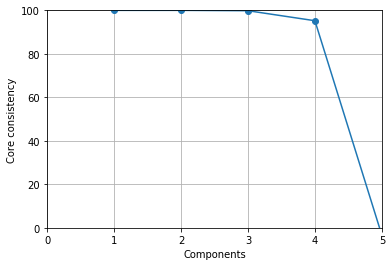

In [9]:
num_max_components = 5
cc = metrics.calculate_core_consistencies(X, num_max_components)
print(cc)
plt.plot(range(1,num_max_components+1), cc,'-o')
plt.grid()
plt.xlabel('Components')
plt.ylabel('Core consistency')
plt.axis([0, 5, 0, 100])
plt.show()